In [15]:
"""
Linear Regression with TensorFlow
"""
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline  

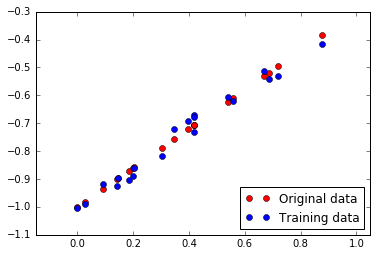

In [17]:
# Generate training data
np.random.seed(1)
def f(x, a, b):
    n    = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax  = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n    = 20
noise_var = 0.001

train_X   = np.random.random((1, n))
ref_Y     = f(train_X, Wref, bref)
train_Y   = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)

# Plot
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

In [10]:
# Prepare for Linear Regression

# Parameters 
training_epochs = 2000
display_step    = 50

# Set TensorFlow Graph
X = tf.placeholder(tf.float32, name="input")
Y = tf.placeholder(tf.float32, name="output")
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a Model
activation = tf.add(tf.mul(X, W), b)

# Define Error Measure and Optimizer
learning_rate   = 0.01
cost = tf.reduce_mean(tf.pow(activation-Y, 2))
# learning_rate   = 0.001
# cost = tf.sqrt(tf.reduce_sum(tf.pow(activation-Y, 2)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# Initializer
init = tf.initialize_all_variables()

In [11]:
# Run! 
sess = tf.Session()
# Initialize
sess.run(init)    
for epoch in range(training_epochs):
    for (x, y) in zip(train_X[0, :], train_Y[0, :]):
        # print "x: ", x, " y: ", y
        sess.run(optimizer, feed_dict={X:x, Y:y})
    
    # Check cost
    if epoch % display_step == 0:
        costval = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print ("Epoch:", "%04d"%(epoch+1), "cost=", "{:.5f}".format(costval))
        Wtemp = sess.run(W)
        btemp = sess.run(b)
        print (" Wtemp is", "{:.4f}".format(Wtemp), "btemp is", "{:.4f}".format(btemp))
        print (" Wref is", "{:.4f}".format(Wref), "bref is", "{:.4f}".format(bref))
        
# Final W and b
Wopt = sess.run(W)
bopt = sess.run(b)
fopt = f(train_X, Wopt, bopt)

('Epoch:', '0001', 'cost=', '0.21532')
(' Wtemp is', '-0.6964', 'btemp is', '-0.1715')
(' Wref is', '0.7000', 'bref is', '-1.0000')
('Epoch:', '0051', 'cost=', '0.01696')
(' Wtemp is', '0.1656', 'btemp is', '-0.7954')
(' Wref is', '0.7000', 'bref is', '-1.0000')
('Epoch:', '0101', 'cost=', '0.00264')
(' Wtemp is', '0.5047', 'btemp is', '-0.9280')
(' Wref is', '0.7000', 'bref is', '-1.0000')
('Epoch:', '0151', 'cost=', '0.00083')
(' Wtemp is', '0.6247', 'btemp is', '-0.9750')
(' Wref is', '0.7000', 'bref is', '-1.0000')
('Epoch:', '0201', 'cost=', '0.00060')
(' Wtemp is', '0.6672', 'btemp is', '-0.9916')
(' Wref is', '0.7000', 'bref is', '-1.0000')
('Epoch:', '0251', 'cost=', '0.00057')
(' Wtemp is', '0.6823', 'btemp is', '-0.9975')
(' Wref is', '0.7000', 'bref is', '-1.0000')
('Epoch:', '0301', 'cost=', '0.00057')
(' Wtemp is', '0.6876', 'btemp is', '-0.9996')
(' Wref is', '0.7000', 'bref is', '-1.0000')
('Epoch:', '0351', 'cost=', '0.00056')
(' Wtemp is', '0.6895', 'btemp is', '-1.000

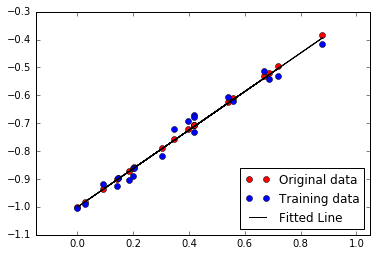

In [13]:
# Plot Results
plt.figure(2)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], fopt[0, :], 'k-', label='Fitted Line')
plt.axis('equal')
plt.legend(loc='lower right')